In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, linalg

In [2]:
from src.DataLoader import *
from src.Modelisation import *
from src.Visualisation import *

In [3]:
cheminCSV = "./data/sport_raw.csv"
dfSport = loadData(cheminCSV)
print(dfSport.head())

Données chargées avec succès.
   individu_id        date  activite  duree unite  poids_kg  calories
0         1001  2025-01-01      velo  15.73   min      74.7     134.3
1         1001  2025-01-02    course  56.67   min      74.7     731.2
2         1001  2025-01-03    course   1.26     h      74.7     966.9
3         1001  2025-01-04  natation  39.72   min      74.7     437.7
4         1001  2025-01-05      velo  37.32   min      74.7     336.3


In [4]:
dfSport = nettoyageDataSport(dfSport)

Données sport nettoyées avec succès.



In [5]:
infoDataFrame(dfSport)

Info DataFrame:
Taille: (4824, 7)

                      dtype
individu_id           int64
date         datetime64[ns]
activite             object
duree               float64
unite                object
poids_kg            float64
calories            float64

Statistiques descriptives:
       individu_id                           date        duree     poids_kg  \
count  4824.000000                           4824  4824.000000  4824.000000   
mean   1040.520937  2025-01-30 12:12:14.328358400    49.061582    70.651026   
min    1001.000000            2025-01-01 00:00:00    10.000000    51.700000   
25%    1021.000000            2025-01-16 00:00:00    37.247500    65.400000   
50%    1040.000000            2025-01-31 00:00:00    48.215000    70.200000   
75%    1060.000000            2025-02-14 00:00:00    60.000000    76.600000   
max    1080.000000            2025-03-01 00:00:00   118.200000    96.100000   
std      23.081237                            NaN    17.175052     8.578073   

 

In [6]:
cheminCSV = "./data/travail_raw.csv"
dfTravail = loadData(cheminCSV)
print(dfTravail.head())

Données chargées avec succès.
   individu_id        date tasses_cafe  heures_travail  productivite
0         1001  2025-02-01           3             6.1          62.6
1         1001  2025-02-02           3             6.4          58.4
2         1001  2025-02-03           4             7.4          58.0
3         1001  2025-02-04           3             9.6          55.5
4         1001  2025-02-05           1             7.1          45.5


In [7]:
dfTravail = nettoyageDataTravail(dfTravail)

Données sport nettoyées avec succès.



In [8]:
infoDataFrame(dfTravail)

Info DataFrame:
Taille: (2424, 5)

                         dtype
individu_id              int64
date            datetime64[ns]
tasses_cafe              int64
heures_travail         float64
productivite           float64

Statistiques descriptives:
       individu_id                           date  tasses_cafe  \
count  2424.000000                           2424  2424.000000   
mean   1040.483911  2025-02-15 11:48:07.128712960     3.014026   
min    1001.000000            2025-02-01 00:00:00     0.000000   
25%    1020.750000            2025-02-08 00:00:00     2.000000   
50%    1041.000000            2025-02-15 00:00:00     3.000000   
75%    1060.000000            2025-02-23 00:00:00     4.000000   
max    1080.000000            2025-03-02 00:00:00    11.000000   
std      23.081647                            NaN     1.743513   

       heures_travail  productivite  
count     2424.000000   2424.000000  
mean         7.462952     58.071988  
min          4.500000     15.000000  
25% 

In [9]:
activite = "velo"
res, X, Y = modeliserActiviteLineaire(dfSport, activite)
slope, intercept, r_value, p_value, std_er = res

# Résultats
print(f"Activité: {activite} -> y = {slope:.2f}x + {intercept:.2f}")
print(f"  R² = {r_value**2:.3f}")
print(f"  p-value: {p_value:.2f}")
print(f"  Erreur standard: {std_er:.2f} et t = a / std_er = {slope/std_er:.2f}")

Activité: velo -> y = 9.48x + -8.57
  R² = 0.729
  p-value: 0.00
  Erreur standard: 0.13 et t = a / std_er = 71.65


    Graphique de régression linéaire sauvegardé sous: '/app/resultats/RegressionLineaire_velo.png'


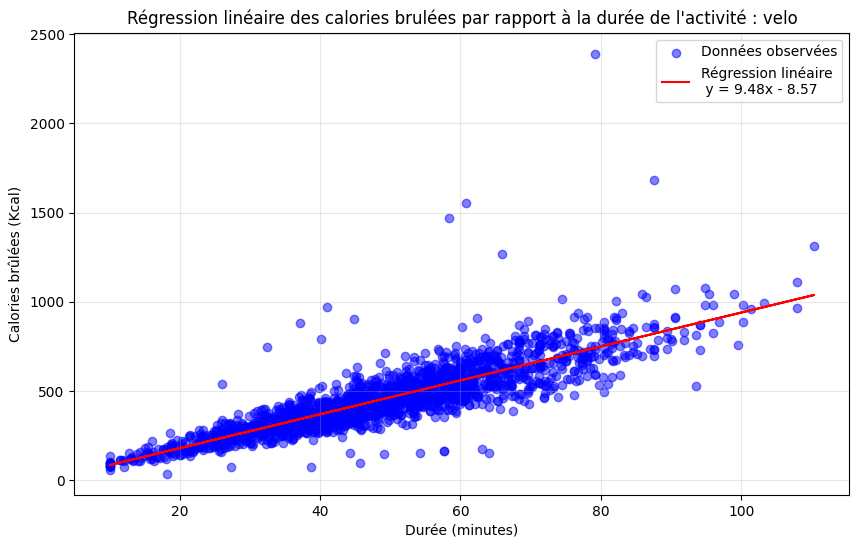

In [10]:
tracerRegression(X, Y, slope, intercept, activite, show=True)

In [11]:
res, X1, X2, Y = modeliserActiviteMultivariee(dfSport, activite)
beta, residuals, rank, s, k, rmse, r2 = res
a, b, c = beta

dfSportFiltre = dfSport[dfSport['activite'] == activite]
calMET = calculerCaloriesMET(activite, 60, 70)
calModele = calculerCaloriesModele(a, b, c, 60, 70)
ecartRelatif = 100 * abs(calModele - calMET) / calMET if calMET != 0 else 0.0

# Résultats
print(f"Activité: {activite} -> calories = {a:.2f}*duree + {b:.2f}*poids + {c:.2f}")
print(f"    R²: {r2:.3f})")
print(f"    Résidus: {residuals}")
print(f"    Erreur moyenne par prédiction: ±{rmse:.2f} calories soit {100*rmse/dfSportFiltre['calories'].mean():.2f}% d'erreur")
print(f"    Rang: {rank}")
print(f"    Singular values: {s}")
print(f"    Conditionnement (κ): {k:.2f}")
print(f"    Comparaison MET vs Modèle:")
print(f"        MET: {calMET:.2f} kcal")
print(f"        Modèle: {calModele:.2f} kcal")
print(f"        Ecart relatif: {ecartRelatif:.2f}%")

Activité: velo -> calories = 9.38*duree + 6.21*poids + -442.66
    R²: 0.807)
    Résidus: 13316815.636338025
    Erreur moyenne par prédiction: ±83.39 calories soit 18.23% d'erreur
    Rang: 3
    Singular values: [3803.62087002  641.86286351    5.03489521]
    Conditionnement (κ): 755.45
    Comparaison MET vs Modèle:
        MET: 551.25 kcal
        Modèle: 555.46 kcal
        Ecart relatif: 0.76%


    Graphique de régression linéaire sauvegardé sous: '/app/resultats/RegressionLineaireMultivariée_velo.png'


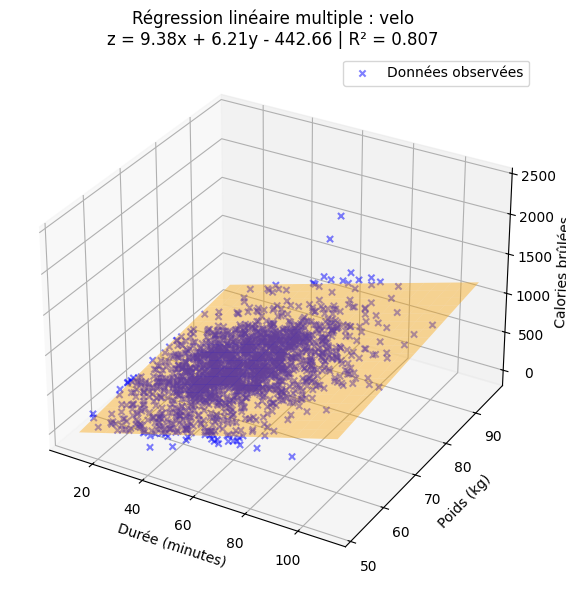

In [12]:
tracerRegression3D(X1, X2, Y, a, b, c, activite, r2, show=True)

In [13]:
res, X, Y = modeliserProductiviteLineaire(dfTravail)
slope, intercept, r_value, p_value, std_er = res

# Résultats
print(f"Productivité: -> y = {slope:.2f}x + {intercept:.2f}")
print(f"Maximum: Vu que c'est une droite, pas de maximum défini. On doit regarder le polynome degré 2.")
print(f"  R²: {r_value**2:.3f}")
print(f"  p-value: {p_value:.2f}")
print(f"  Erreur standard: {std_er:.2f} et t = a / std_er = {slope/std_er:.2f}")

Productivité: -> y = 4.31x + 45.23
Maximum: Vu que c'est une droite, pas de maximum défini. On doit regarder le polynome degré 2.
  R²: 0.485
  p-value: 0.00
  Erreur standard: 0.09 et t = a / std_er = 47.04


    Graphique de régression linéaire sauvegardé sous: '/app/resultats/RegressionLineaire_productivité.png'


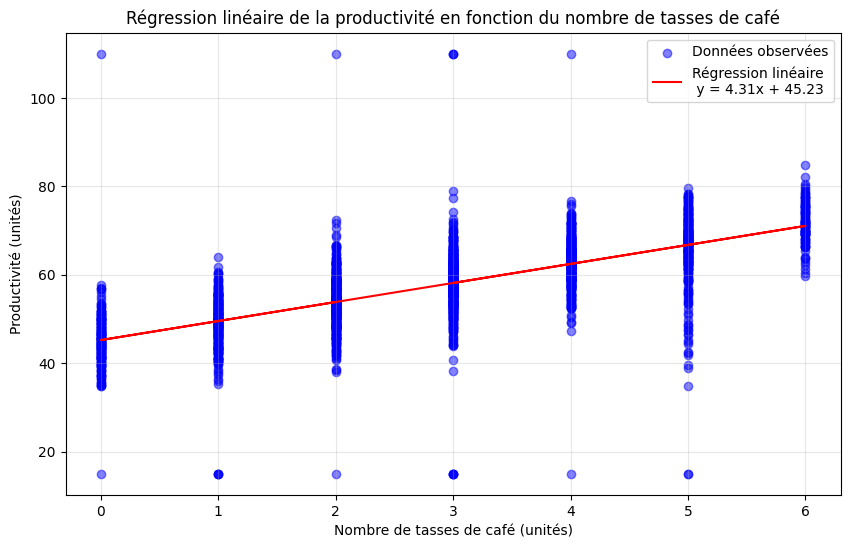

In [14]:
tracerRegression(X, Y, slope, intercept, "productivité", show=True)

In [15]:
a, b, c, max, r2 = modeliserProductivitePolynome(dfTravail)
print(f"Productivité: -> y = {a:.2f}x² + {b:.2f}x + {c:.2f}")
print(f"  Maximum: {max:.2f} tasses de café")
print(f"  R²: {r2:.3f}")
print(f"    Le coefficient a est négatif ({a:.2f}). Cela indique que la productivité augmente jusqu'à un maximum ({max:.2f}), puis diminue.\n    Dans le cas 0-6 tasses, on s'apparente à une droite croissante. Donc plus on boit de café, plus on est productif.")


Productivité: -> y = -0.17x² + 5.18x + 44.47
  Maximum: 15.64 tasses de café
  R²: 0.511
    Le coefficient a est négatif (-0.17). Cela indique que la productivité augmente jusqu'à un maximum (15.64), puis diminue.
    Dans le cas 0-6 tasses, on s'apparente à une droite croissante. Donc plus on boit de café, plus on est productif.


    Graphique de régression polynomiale sauvegardé sous: '/app/resultats/RegressionPolynomiale_productivite.png'


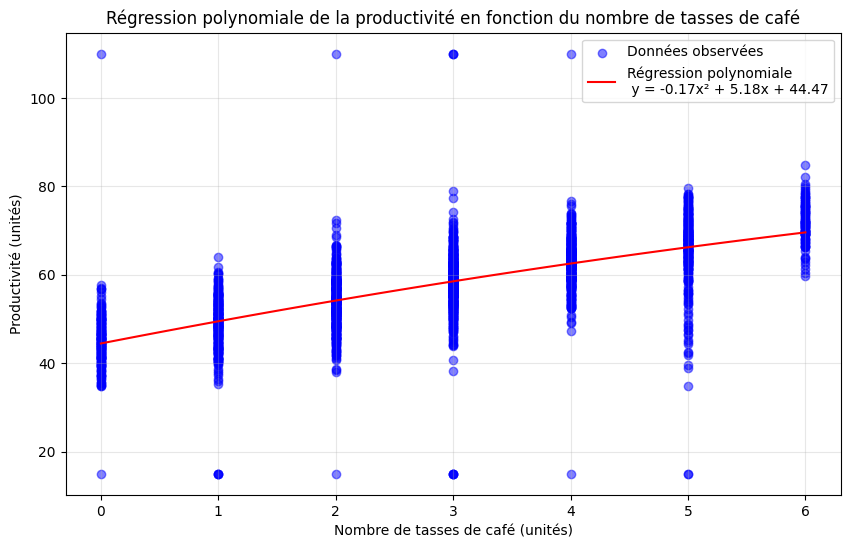

In [16]:
tracerPolynome(X, Y, np.array([a, b, c]), show=True)

In [17]:
seuilIntense = dfSport['calories'].quantile(0.75)
print(seuilIntense)

647.975


In [18]:

dfSportIntense = dfSport.copy()
dfSportIntense['sportIntense'] = dfSportIntense['calories'] >= seuilIntense
print(dfSportIntense)

      individu_id       date  activite  duree unite  poids_kg  calories  \
0            1001 2025-01-01      velo  15.73   min      74.7     134.3   
1            1001 2025-01-02    course  56.67   min      74.7     731.2   
2            1001 2025-01-03    course  75.60   min      74.7     966.9   
3            1001 2025-01-04  natation  39.72   min      74.7     437.7   
4            1001 2025-01-05      velo  37.32   min      74.7     336.3   
...           ...        ...       ...    ...   ...       ...       ...   
4819         1032 2025-02-01    course  40.20   min      77.2     651.7   
4820         1035 2025-02-17      velo  59.92   min      72.3     595.1   
4821         1053 2025-02-07      velo  47.46   min      70.8     438.7   
4822         1047 2025-02-26    course  39.56   min      67.8     430.5   
4823         1040 2025-02-07    course  64.78   min      74.3     657.9   

      sportIntense  
0            False  
1             True  
2             True  
3            Fa

In [19]:
dfSportJour = dfSportIntense.groupby(['individu_id', 'date']).agg({
        'calories': 'sum',
        'sportIntense': 'max',
        'duree': 'sum'
    }).reset_index()
print(dfSportJour)

      individu_id       date  calories  sportIntense  duree
0            1001 2025-01-01     134.3         False  15.73
1            1001 2025-01-02     731.2          True  56.67
2            1001 2025-01-03     966.9          True  75.60
3            1001 2025-01-04     437.7         False  39.72
4            1001 2025-01-05     336.3         False  37.32
...           ...        ...       ...           ...    ...
4795         1080 2025-02-25     478.6         False  44.42
4796         1080 2025-02-26     476.5         False  37.24
4797         1080 2025-02-27     382.8         False  31.07
4798         1080 2025-02-28     343.9         False  37.31
4799         1080 2025-03-01     328.7         False  29.81

[4800 rows x 5 columns]


In [20]:
dfSportJour['date_lendemain'] = dfSportJour['date'] + pd.Timedelta(days=1)
print(dfSportJour)

      individu_id       date  calories  sportIntense  duree date_lendemain
0            1001 2025-01-01     134.3         False  15.73     2025-01-02
1            1001 2025-01-02     731.2          True  56.67     2025-01-03
2            1001 2025-01-03     966.9          True  75.60     2025-01-04
3            1001 2025-01-04     437.7         False  39.72     2025-01-05
4            1001 2025-01-05     336.3         False  37.32     2025-01-06
...           ...        ...       ...           ...    ...            ...
4795         1080 2025-02-25     478.6         False  44.42     2025-02-26
4796         1080 2025-02-26     476.5         False  37.24     2025-02-27
4797         1080 2025-02-27     382.8         False  31.07     2025-02-28
4798         1080 2025-02-28     343.9         False  37.31     2025-03-01
4799         1080 2025-03-01     328.7         False  29.81     2025-03-02

[4800 rows x 6 columns]


In [21]:
dfMerged = dfSportJour.merge(
        dfTravail[['individu_id', 'date', 'tasses_cafe']],
        left_on=['individu_id', 'date_lendemain'],
        right_on=['individu_id', 'date'],
        suffixes=('_sport', '_travail')
    )
print(f"\nNombre d'observations avec données sport et café lendemain: {len(dfMerged)}")
print(dfMerged.head())


Nombre d'observations avec données sport et café lendemain: 2424
   individu_id date_sport  calories  sportIntense  duree date_lendemain  \
0         1001 2025-01-31     452.7         False  45.46     2025-02-01   
1         1001 2025-02-01     331.5         False  34.56     2025-02-02   
2         1001 2025-02-02    1260.0          True  82.76     2025-02-03   
3         1001 2025-02-03     743.1          True  81.60     2025-02-04   
4         1001 2025-02-04     726.2          True  78.17     2025-02-05   

  date_travail  tasses_cafe  
0   2025-02-01            3  
1   2025-02-02            3  
2   2025-02-03            4  
3   2025-02-04            3  
4   2025-02-05            1  


In [22]:
corr_pearson, p_corr = stats.pearsonr(dfMerged['calories'], dfMerged['tasses_cafe'])
print(f"Corrélation de Pearson: {corr_pearson:.4f}")
print(f"P-value: {p_corr:.4f}")

Corrélation de Pearson: -0.0314
P-value: 0.1228


In [23]:
cafeApresIntense = dfMerged[dfMerged['sportIntense'] == True]['tasses_cafe']
cafeApresNormal = dfMerged[dfMerged['sportIntense'] == False]['tasses_cafe']

In [24]:
print(f"\nAprès sport INTENSE (n={len(cafeApresIntense)}):")
print(f"  Moyenne: {cafeApresIntense.mean():.2f} tasses")
print(f"  Écart-type: {cafeApresIntense.std():.2f}")
print(f"  Médiane: {cafeApresIntense.median():.2f}")

print(f"\nAprès sport NORMAL (n={len(cafeApresNormal)}):")
print(f"  Moyenne: {cafeApresNormal.mean():.2f} tasses")
print(f"  Écart-type: {cafeApresNormal.std():.2f}")
print(f"  Médiane: {cafeApresNormal.median():.2f}")


Après sport INTENSE (n=598):
  Moyenne: 2.89 tasses
  Écart-type: 1.75
  Médiane: 3.00

Après sport NORMAL (n=1826):
  Moyenne: 3.05 tasses
  Écart-type: 1.74
  Médiane: 3.00


In [25]:
diffMoyenne = cafeApresIntense.mean() - cafeApresNormal.mean()
print(f"\n➜ Différence de moyenne: {diffMoyenne:.2f} tasses")


➜ Différence de moyenne: -0.16 tasses


In [27]:
tStat, pValue = stats.ttest_ind(cafeApresIntense, cafeApresNormal)
print(f"Statistique t: {tStat:.4f}")
print(f"P-value: {pValue:.4f}")
print(f"Seuil α: 0.05")

Statistique t: -1.9844
P-value: 0.0473
Seuil α: 0.05


In [28]:
pooledStd = np.sqrt((cafeApresIntense.std()**2 + cafeApresNormal.std()**2) / 2)
cohensD = diffMoyenne / pooledStd if pooledStd > 0 else 0
print(f"\nTaille d'effet (Cohen's d): {cohensD:.4f}")


Taille d'effet (Cohen's d): -0.0934
